In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG

ModuleNotFoundError: No module named 'classes'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def v_fitting_standard(y_1, y_2, y_3):
    # Fit using a symmetric 'V' function, to find the interpolated minimum for three datapoints y_1, y_2, y_3,
    # which are considered to be at coordinates x=-1, x=0 and x=+1
    if y_1 > y_3:
        x = 0.5 * (y_1 - y_3) / (y_1 - y_2)
        y = y_2 - x * (y_1 - y_2)
    else:
        x = 0.5 * (y_1 - y_3) / (y_3 - y_2)
        y = y_2 + x * (y_3 - y_2)

    return x, y

In [ ]:
# Run optical gating

sequence = "D:/Data/both 800fps/brightfield/*tif"
reference_sequence = "D:/Data/both 800fps/ref_seq.tif"
reference_sequence_period = "D:/Data/both 800fps/ref_seq.txt"

#sequence = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
#reference_sequence = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
#reference_sequence_period = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"

og = BOG()
og.logger.set_normal()
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
#og.reduce_reference_framerate(3)
og.run()

BOG i Loading sequence...
BOG ✓ Sequence loaded with 2000 frames
BOG i Loading reference sequence...
BOG ✓ Reference sequence loaded with 311 frames
BOG i Setting reference period to 306.26237218280687
BOG i Calculating SADs...
BOG ✓ SADs calculated
BOG i Calculating phases...
BOG ⚠ Subframe minima outside range -1.1809516251216252 setting to -0.5
BOG ⚠ Subframe minima outside range -1.2729505820253615 setting to -0.5
BOG ⚠ Subframe minima outside range -1.6514048293934018 setting to -0.5
BOG ⚠ Subframe minima outside range 1.5274655414209617 setting to 0.5
BOG ⚠ Subframe minima outside range 1.2389907874583628 setting to 0.5
BOG ⚠ Subframe minima outside range 1.19413485171044 setting to 0.5
BOG ⚠ Subframe minima outside range 0.5532822826707683 setting to 0.5
BOG ⚠ Subframe minima outside range 0.5189023782546307 setting to 0.5
BOG ✓ Phases calculated
BOG i Calculating delta phases...
BOG ✓ Delta phases calculated
BOG i Unwrapping phases...
BOG ✓ Unwrapped phases calculated
BOG ✓ Fin

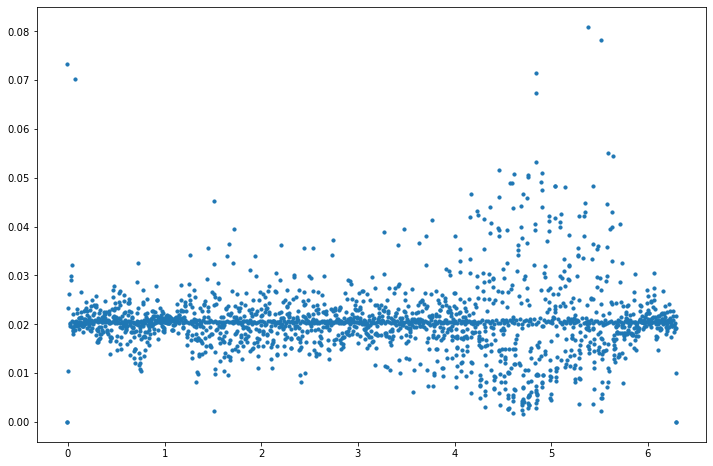

In [ ]:
plt.figure(figsize = (12, 8))
plt.scatter(og.phases[1::], og.delta_phases, s = 10)
plt.show()

In [ ]:
# Get our reference SADs
ref_sads = []
for i in range(og.reference_sequence.shape[0]):
    ref_sad = []
    for j in range(og.reference_sequence.shape[0]):
        ref_sad.append(np.sum(np.abs(og.reference_sequence[i].astype(np.int64) - og.reference_sequence[j].astype(np.int64))))
    ref_sads.append(ref_sad)
ref_sads = np.array(ref_sads)

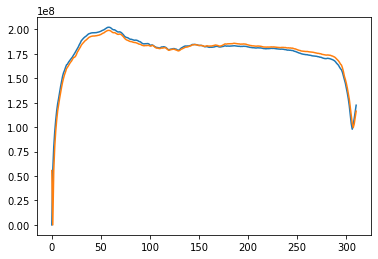

In [ ]:
plt.plot(ref_sads[0])
plt.plot(ref_sads[1])

In [ ]:
array = np.zeros((ref_sads[0].shape))

xs = np.arange(ref_sads[0].shape[0])
print(xs)

def plot_SAD_interpolation():
    from ipywidgets import interact, widgets, Layout

    def plot_func(weight, offset, frame):
        plt.figure(figsize=(8,6))

        i, d = divmod(weight, 1)
        array = np.zeros((ref_sads[0].shape))
        array[int(i)] =  1 - d
        array[int(i + 1)] = d
        ref_sad = np.average(ref_sads, weights = array, axis = 0) + offset

        ref_sad_minima = np.argmin(ref_sad[2:-2]) + 2
        y_1 = ref_sad[ref_sad_minima - 1]
        y_2 = ref_sad[ref_sad_minima]
        y_3 = ref_sad[ref_sad_minima + 1]
        plt.annotate(f"Reference subframe minima:\n{v_fitting_standard(y_1,y_2,y_3)[0]:.3f}\n{y_1} {y_2} {y_3}", [0, 0])

        sad_minima = np.argmin(og.sads[frame][2:-2]) + 2
        y_1 = og.sads[frame][sad_minima - 1]
        y_2 = og.sads[frame][sad_minima]
        y_3 = og.sads[frame][sad_minima + 1]
        plt.annotate(f"Sequence subframe minima:\n{v_fitting_standard(y_1,y_2,y_3)[0]:.3f}", xy=(20, 0))

        plt.scatter(xs, ref_sad)
        #plt.ylim(-9000, 550000)
        plt.scatter(xs, og.sads[frame])
        plt.tight_layout()
    interact(plot_func, 
             weight = widgets.FloatSlider(min=0, max=array.shape[0]-2, step=0.01, value=0, layout=Layout(width='1300px')),
             offset = widgets.IntSlider(min=-30000, max=30000, value=0, layout=Layout(width='1300px')),
             frame = widgets.BoundedIntText(min = 0, max = og.sequence.shape[0]))

plot_SAD_interpolation()

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

interactive(children=(FloatSlider(value=0.0, description='weight', layout=Layout(width='1300px'), max=309.0, s…

### First method: match our reference minima with our sequence minima

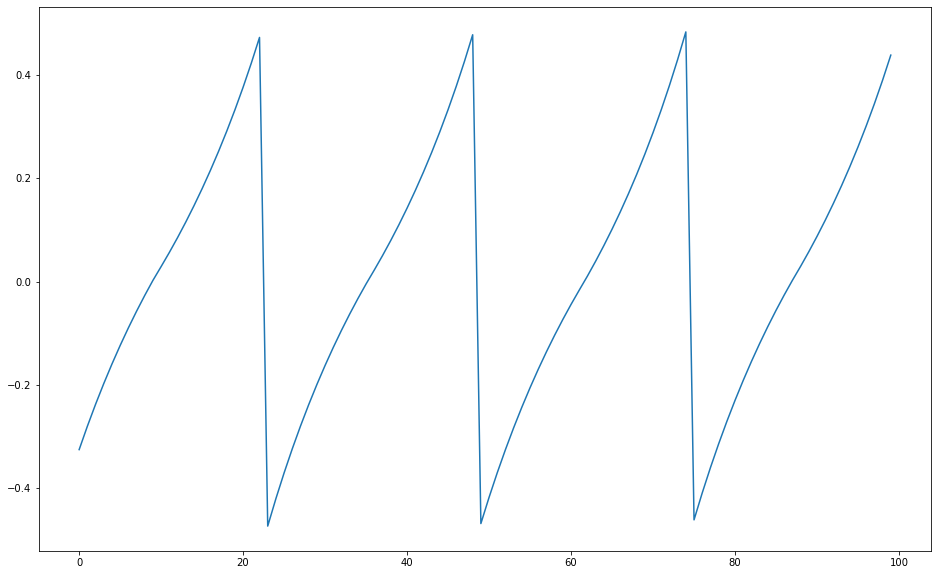

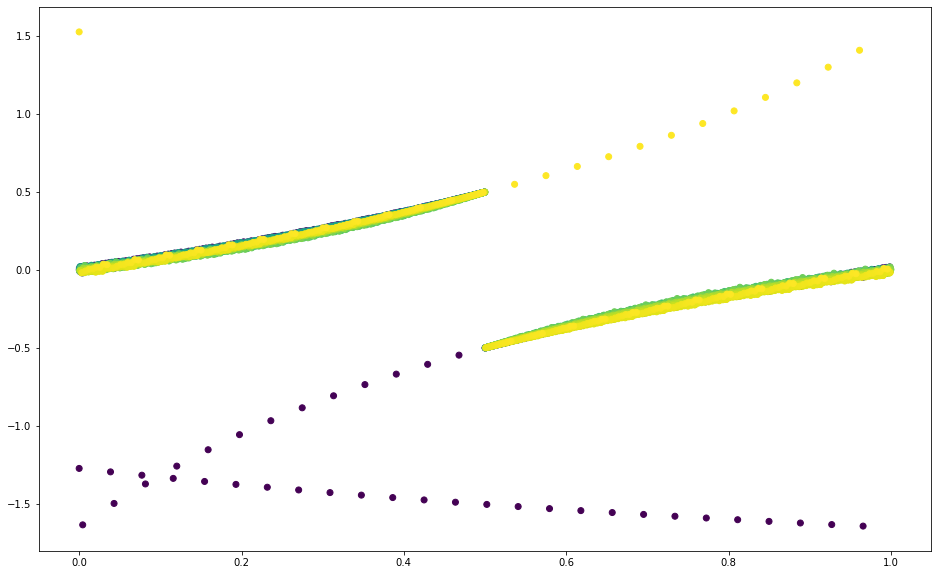

In [ ]:


array = np.zeros((ref_sads[0].shape))
minimas = []
ds = []
for weight in np.linspace(0, array.shape[0]-2, 8000):
    i, d = divmod(weight, 1)
    array = np.zeros((ref_sads[0].shape))
    array[int(i)] =  1 - d
    array[int(i + 1)] = d
    ref_sad = np.average(ref_sads, weights = array, axis = 0)

    ref_sad_minima = np.argmin(ref_sad[2:-2]) + 2
    y_1 = ref_sad[ref_sad_minima - 1]
    y_2 = ref_sad[ref_sad_minima]
    y_3 = ref_sad[ref_sad_minima + 1]
    minimas.append(v_fitting_standard(y_1,y_2,y_3)[0])
    ds.append(d)

plt.figure(figsize = (16,10))
plt.plot(minimas[1000:1100])
plt.show()

plt.figure(figsize = (16,10))
plt.scatter(ds, minimas, c = range(len(minimas)))
plt.show()